In [3]:
print("Hello World!")


Hello World!


In [4]:
import pandas as pd
FilePath = "/Users/fuyuuku/Projects/Titanic/titanic/train.csv"

def load_data(file_path = FilePath):
    data = pd.read_csv(file_path)
    return data


In [5]:
data = load_data()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Each row represents a passenger on the Titanic. There are 10 attributes for each passenger:
1. PassengerId: A unique identifier for each passenger.
2. Survived: Whether the passenger survived (1) or not (0).
3. Pclass: The ticket class of the passenger (1st, 2nd, or 3rd).
4. Name: The name of the passenger.
5. Sex: The sex of the passenger (male or female).
6. Age: The age of the passenger.
7. SibSp: The number of siblings/spouses aboard the Titanic.
8. Parch: The number of parents/children aboard the Titanic.
9. Ticket: The ticket number of the passenger.
10. Fare: The fare paid by the passenger.
11. Cabin: The cabin number of the passenger.
12. Embarked: The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Noticed that some attributes has missing values (NaN): 
1. Age 714/891
2. Cabin 204/891
3. Embarked 889/891

In [7]:
print(data["Pclass"].value_counts())
print(data["Sex"].value_counts())
print(data["Embarked"].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


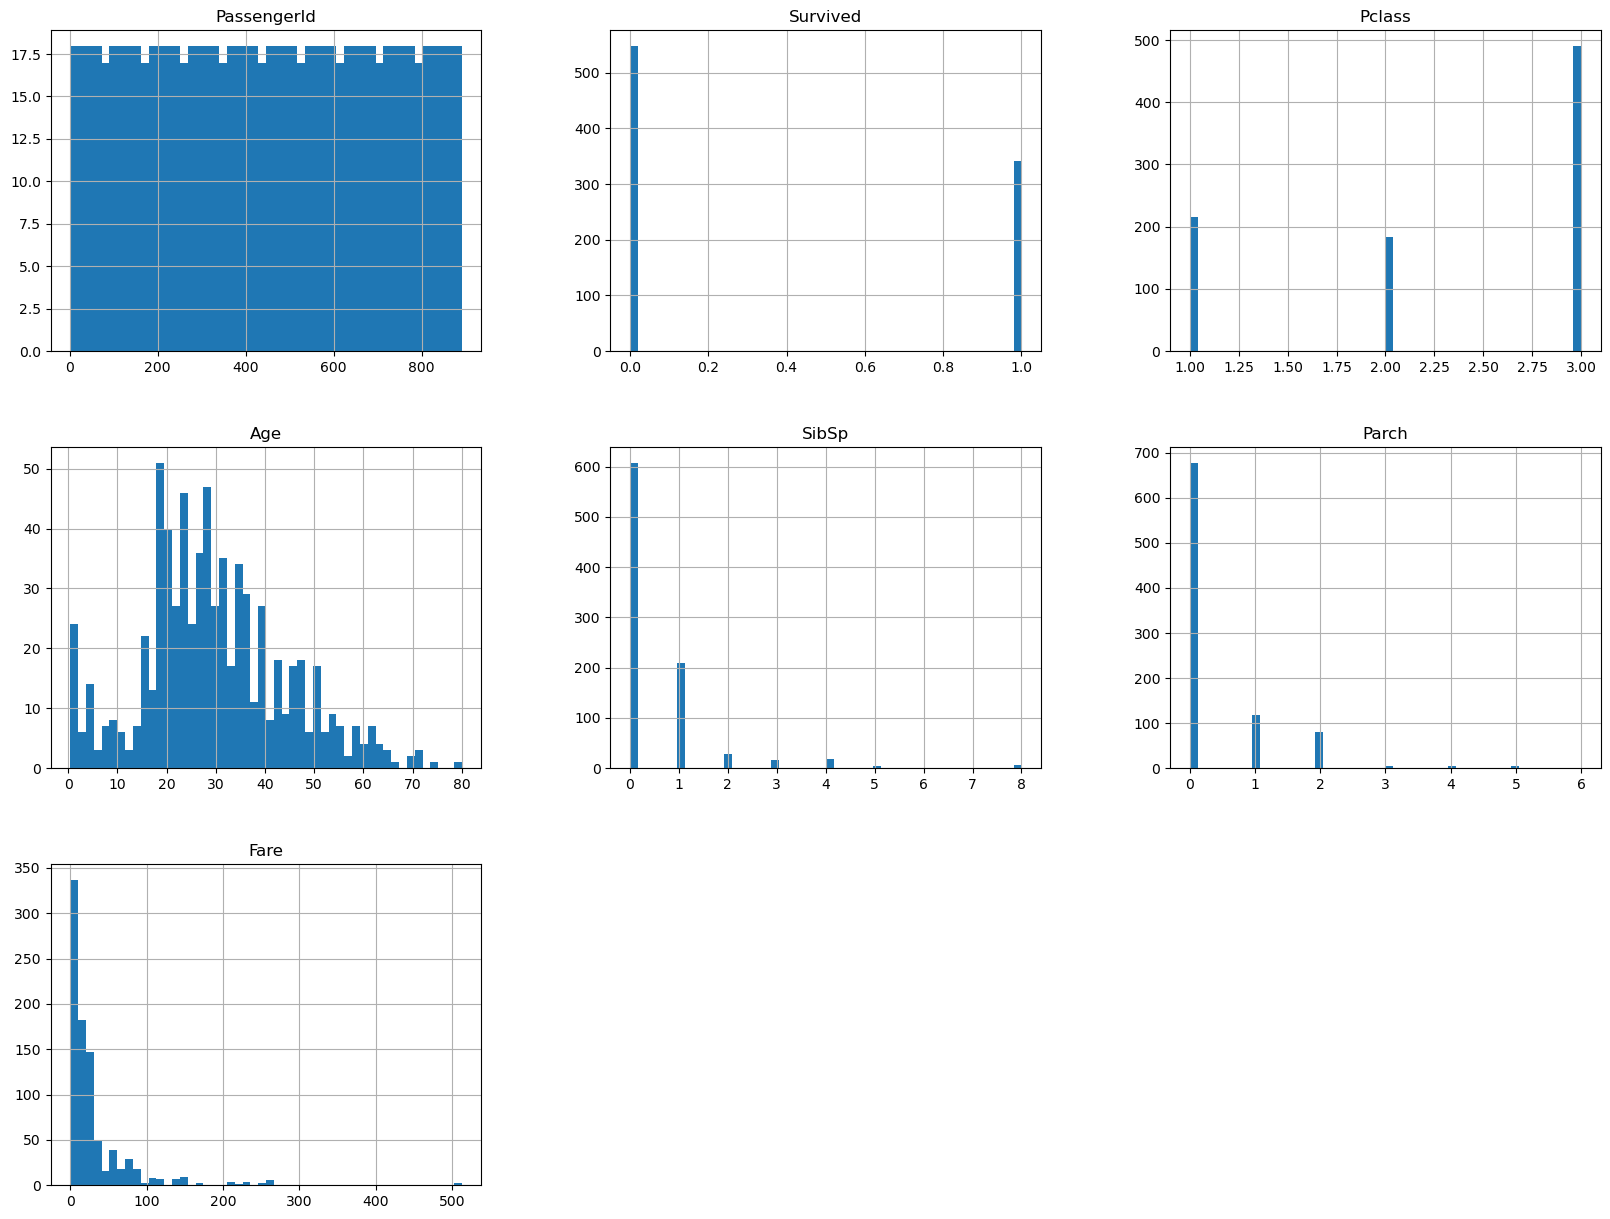

In [9]:
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20, 15))
plt.show()

The hist() method plots a histogram of each numerical attribute, which relies on Matplotlib.

In [13]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [15]:
train_set, test_set = split_train_test(data, 0.2)
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 859 to 378
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  713 non-null    int64  
 1   Survived     713 non-null    int64  
 2   Pclass       713 non-null    int64  
 3   Name         713 non-null    object 
 4   Sex          713 non-null    object 
 5   Age          565 non-null    float64
 6   SibSp        713 non-null    int64  
 7   Parch        713 non-null    int64  
 8   Ticket       713 non-null    object 
 9   Fare         713 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 242 to 378
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     8

To learn how to split the dataset into training set and test set. Actually, there exists "test.csv" file. We can use it to test our model.
However, there is a issue that the test set will not be the same everytime we run the code. To solve this problem, we can use "train_test_split" function in "sklearn.model_selection" module.
```python
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
```
Or just save the test set on the first run and then load it in subsequent runs.

Besides, set a seed for np.random will be helpful to ensure that the results are reproducible.

<Axes: xlabel='Age', ylabel='Fare'>

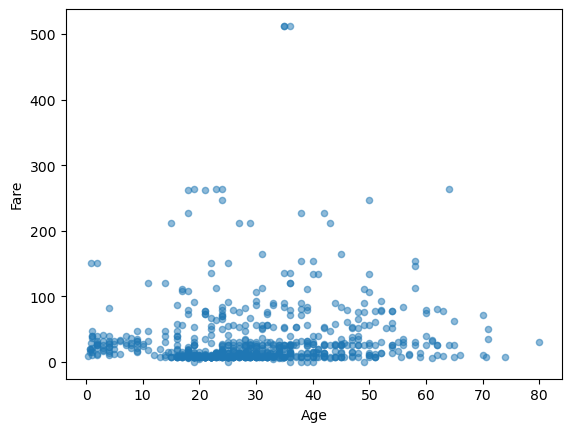

In [19]:
data.plot(kind='scatter', x='Age', y='Fare', alpha = 0.5)

<Axes: xlabel='Age', ylabel='Fare'>

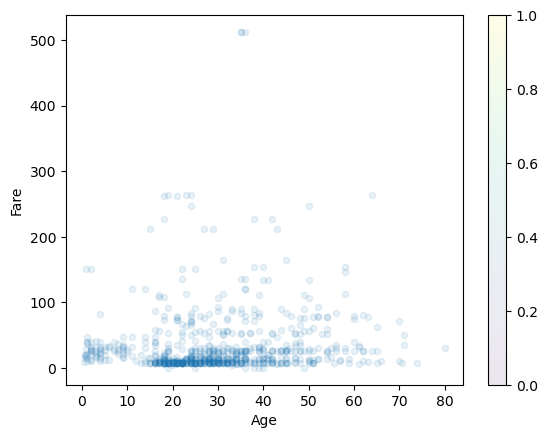

In [20]:
data.plot(kind='scatter', x='Age', y='Fare', alpha=0.1, colorbar=True)

In [22]:
corr_matrix = data.corr(numeric_only=True)
print(corr_matrix["Survived"].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


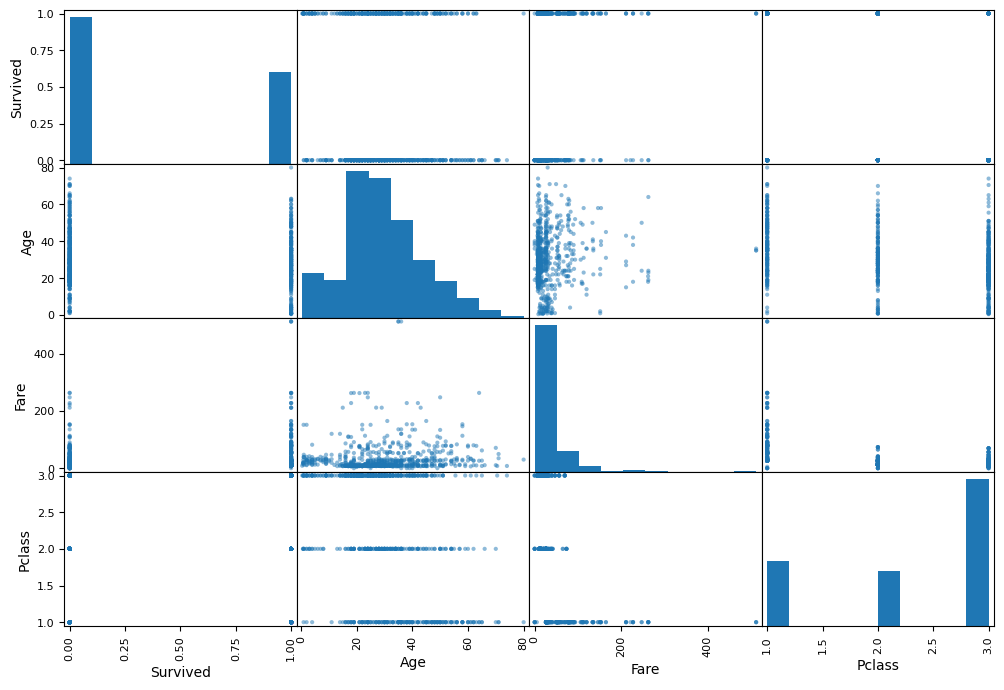

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["Survived", "Age", "Fare", "Pclass"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

There are three ways to clean data
1. Drop the mssing districts
2. Get rid of the whole attribute
3. Set the missing values to some value (zero, the mean, the median, etc.)

In [24]:
data.drop("PassengerId", axis=1, inplace=True) # drop the "PassengerId" column -> method 2
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Two other methods to handle missing values
data.dropna(subset=["Age"])    # method 1: drop the rows where "Age" is missing
data["Age"].fillna(data["Age"].median())  # method 3: set the missing values to the median
data.head()
#Do Not Run This Cell!

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(data)
imputer.statistics_
#Do Not Run This Cell!

# Scikit-Learn Design
Scikit-Learn’s API is remarkably well designed. The main design principles are:
## Consistency
All objects share a consistent and simple interface:
### Estimators
Any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). The estimation itself is performed by the fit() method, and it takes only a dataset as a parameter (or two for supervised learning algorithms; the second dataset contains the labels). Any other parameter needed to guide the estimation process is con‐ sidered a hyperparameter (such as an imputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).
### Transformers
Some estimators (such as an imputer) can also transform a dataset; these are called transformers. Once again, the API is quite simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transforma‐ tion generally relies on the learned parameters, as is the case for an imputer. All transformers also have a convenience method called fit_transform() that is equivalent to calling fit() and then transform() (but sometimes fit_transform() is optimized and runs much faster).
### Predictors
Finally, some estimators are capable of making predictions given a dataset; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: it predicted life satisfaction given a country’s GDP per capita. A predictor has a predict() method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a score() method that measures the quality of the predictions given a test set (and the corresponding labels in the case of supervised learning algorithms).
### Inspection
All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy), and all the estimator’s learned parameters are also accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_).
### Nonproliferation of classes
Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.
### Composition
Existing building blocks are reused as much as possible. For example, it is easy to create a Pipeline estimator from an arbitrary sequence of transformers followed by a final estimator, as we will see.
### Sensible defaults
Scikit-Learn provides reasonable default values for most parameters, making it easy to create a baseline working system quickly.

Convert categorical attributes to numerical attributes

In [28]:
cabin = data[["Cabin"]]
cabin.head(20)

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
5,NaN
6,E46
7,NaN
8,NaN
9,NaN


In [31]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
cabin_encoded = ordinal_encoder.fit_transform(cabin)
cabin_encoded[:20]

array([[ nan],
       [ 81.],
       [ nan],
       [ 55.],
       [ nan],
       [ nan],
       [129.],
       [ nan],
       [ nan],
       [ nan],
       [145.],
       [ 49.],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan]])